<a href="https://colab.research.google.com/github/heti11/MSIB-K2-KelasAwanPintar/blob/main/Non_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-6 Non-Hierarchical Clustering

# Import Library

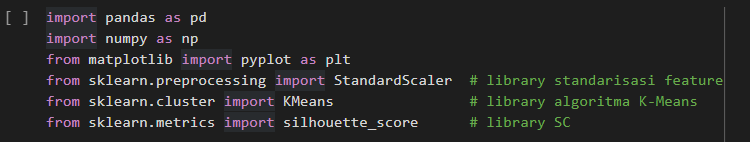

In [ ]:
# Tulis di sini
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler  #library standarisasi feature
from sklearn.cluster import KMeans                #library algoritma K-Means
from sklearn.metrics import silhouette_score      #library SC


Menginstal library machine learning visualization: [yellowbrick](https://www.scikit-yb.org/en/latest/).

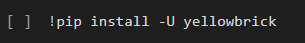

In [ ]:
# Tulis di sini
!pip install -U yellowbrick

Import library [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

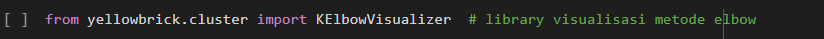

In [ ]:
# Tulis di sini
from yellowbrick.cluster import KElbowVisualizer #library visualisasi metode elbow

# Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

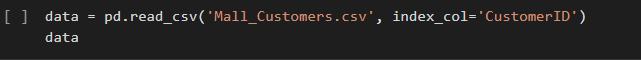

In [ ]:
data = pd.read_csv('/content/Mall_Customers (1).csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


Memeriksa kelengkapan dataset.

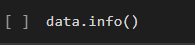

In [ ]:
# Tulis di sini
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan **SpendingScore**.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

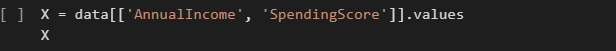

In [ ]:
# Tulis di sini
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

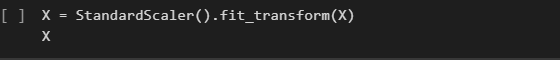

In [ ]:
# Tulis di sini
X = StandardScaler().fit_transform(X)
X

# Metode Elbow

Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau `KElbowVisualizer` pada Python.



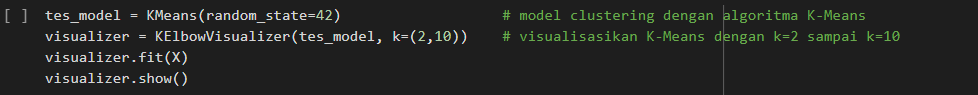

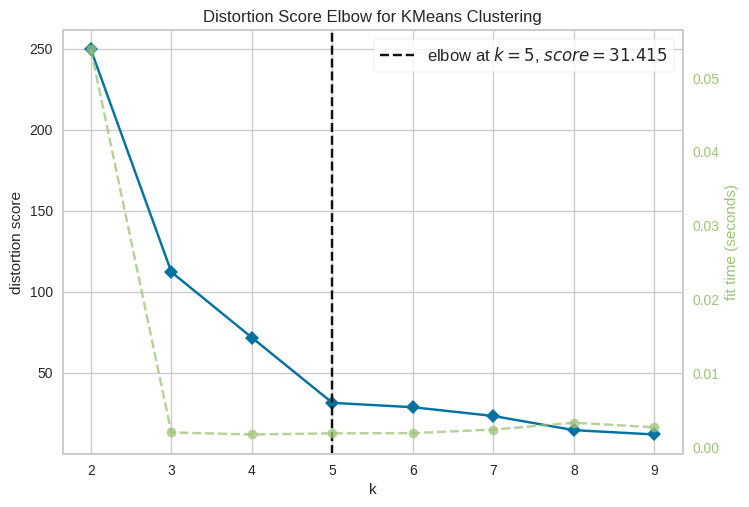

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Tulis di sini
test_model = KMeans(random_state=42)      #model clustering dengan algoritma K-Means
visualizer = KElbowVisualizer(test_model, k=(2,10)) #visualisasikan K-Means dengan k=2 samapi k=10
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 5 (K=5)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.


Kita juga bisa men-tuning hyperparameter K-Means lainnya. Baca dokumentasi lengkapnya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

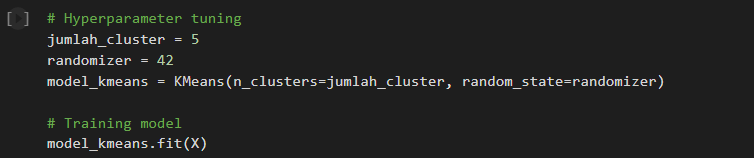

In [ ]:
# Tulis di sini
jumlah_cluster = 5
randomizer = 42
# The issue was you were passing a KMeans object as the n_clusters argument.
# You should pass the integer directly.
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

#Training model
model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

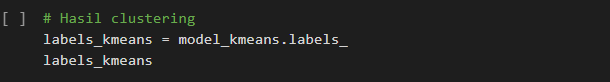

In [ ]:
# Tulis di sini
labels_kmeans = model_kmeans.labels_
labels_kmeans


array([0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 1, 1, 1, 1, 4, 4, 4, 4],
      dtype=int32)

Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

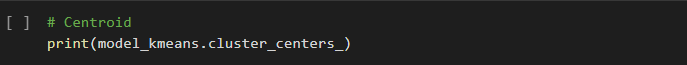

In [ ]:
# Tulis di sini
print(model_kmeans.cluster_centers_)

[[-0.17079383 -0.15322869]
 [ 7.52694521 -0.11868539]
 [-0.11772005  0.91897759]
 [-0.09894748 -1.20506271]
 [ 0.37342132  4.15876808]]


# Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

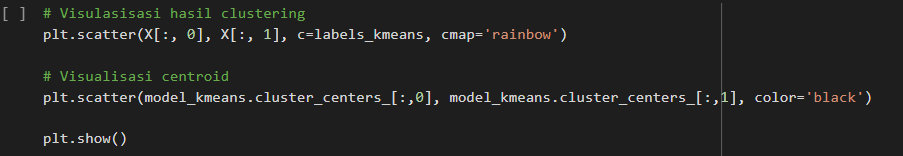

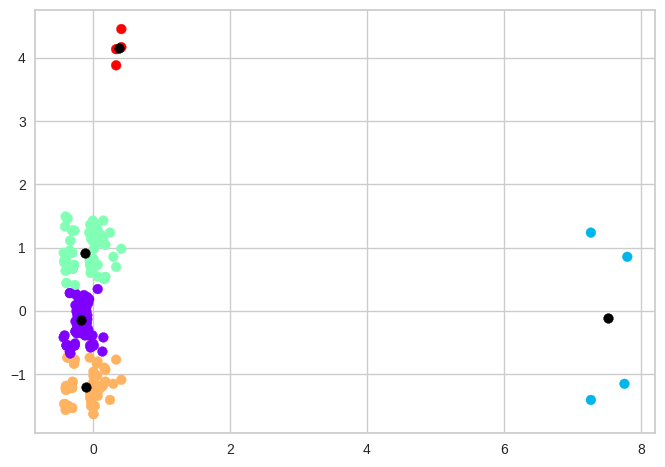

In [ ]:
# Tulis di sini
plt.scatter(X[:,0], X[:,1], c=labels_kmeans, cmap='rainbow')

#visualisasi centriod
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()


Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

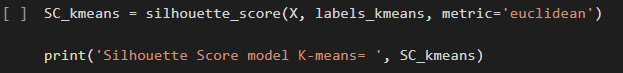

In [ ]:
# Tulis si sini
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')
print('Silhouette Score model k-means=', SC_kmeans)

Silhouette Score model k-means= 0.5726323363898457


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

# Kesimpulan

Simpan hasil clustering ke dalam dataset.

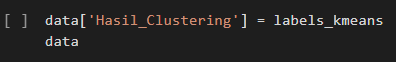

In [ ]:
# Tulis di sini
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,2
3,Female,20,16,6,3
4,Female,23,16,77,2
5,Female,31,17,40,0
...,...,...,...,...,...
209,Female,35,1207,79,1
210,Female,45,126,182,4
211,Male,32,126,174,4


**Contoh**:

Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

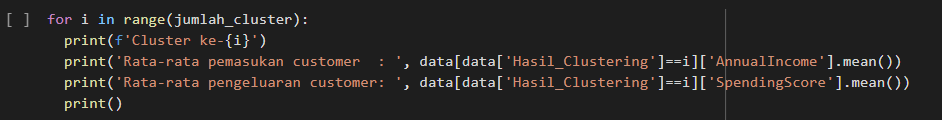

In [ ]:
# Tulis di sini
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer :', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer:', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

Cluster ke-0
Rata-rata pemasukan customer : 52.722772277227726
Rata-rata pengeluaran customer: 47.415841584158414

Cluster ke-1
Rata-rata pemasukan customer : 1167.0
Rata-rata pengeluaran customer: 48.5

Cluster ke-2
Rata-rata pemasukan customer : 60.4054054054054
Rata-rata pengeluaran customer: 81.06756756756756

Cluster ke-3
Rata-rata pemasukan customer : 63.12280701754386
Rata-rata pengeluaran customer: 14.403508771929825

Cluster ke-4
Rata-rata pemasukan customer : 131.5
Rata-rata pengeluaran customer: 182.75



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
- Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

--2024-10-09 09:21:05--  https://drive.google.com/uc?id=1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY&export=download
Resolving drive.google.com (drive.google.com)... 142.251.167.100, 142.251.167.113, 142.251.167.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY&export=download [following]
--2024-10-09 09:21:05--  https://drive.usercontent.google.com/download?id=1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4767 (4.7K) [application/octet-stream]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   4.66K  -

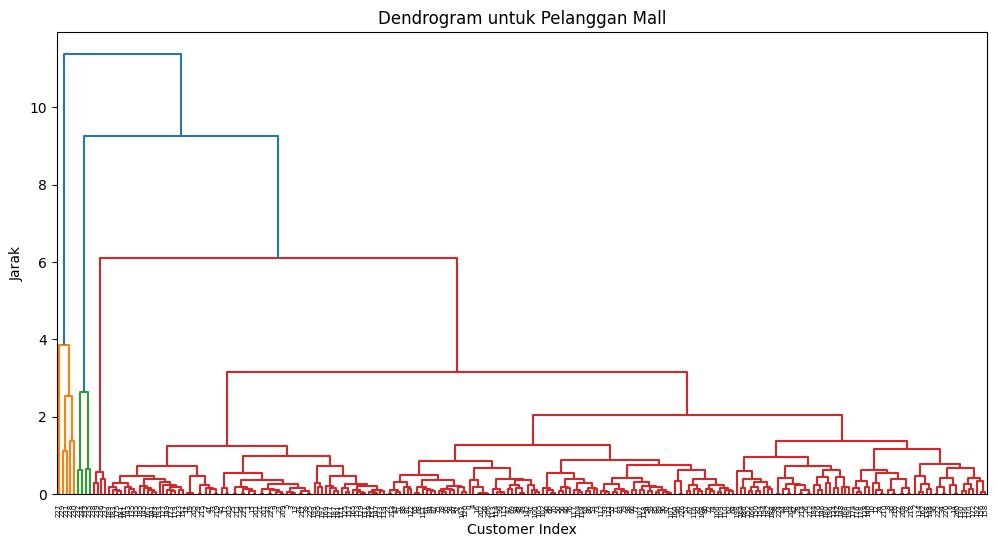

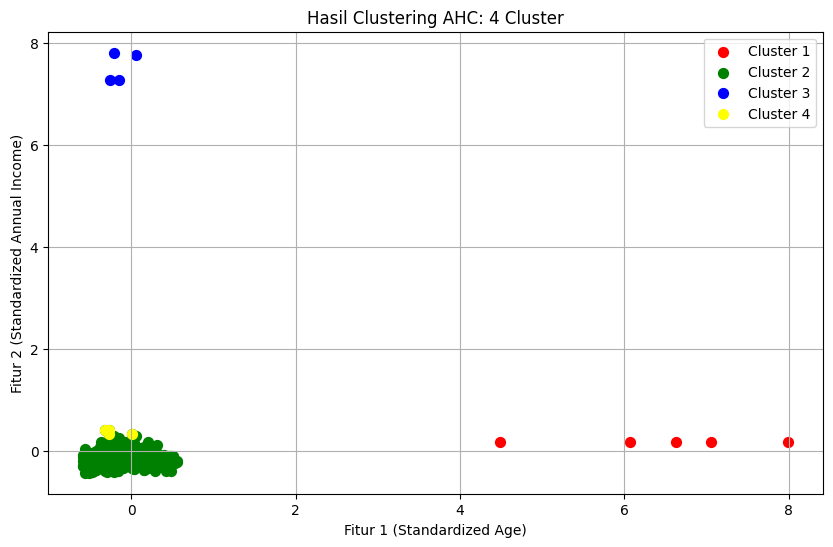

Silhouette Score AHC: 0.73


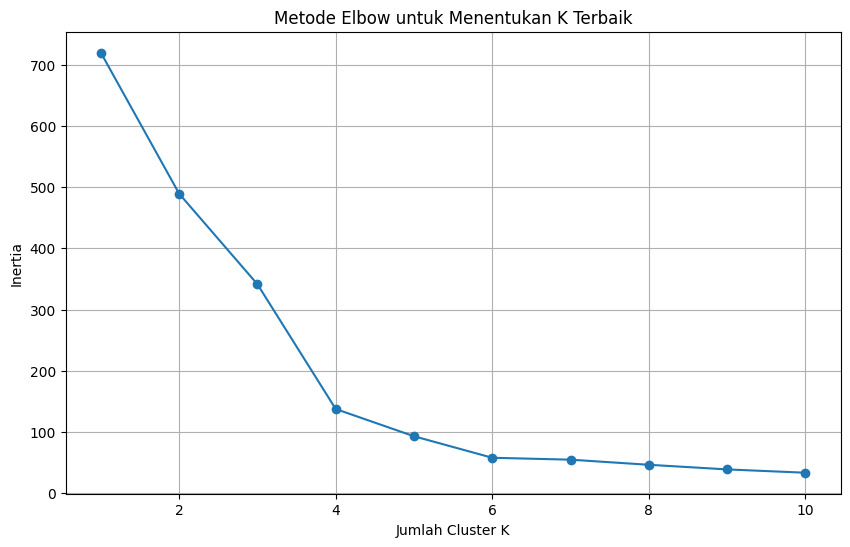

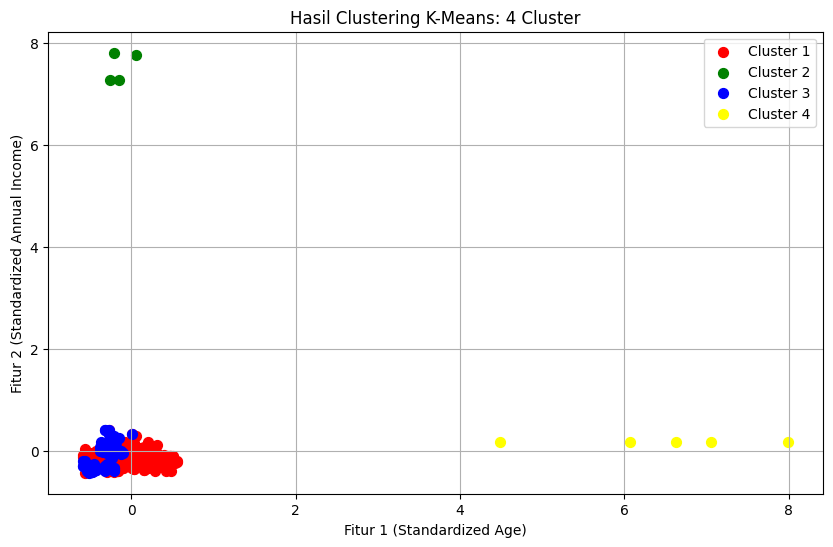

Silhouette Score K-Means: 0.50
Silhouette Score AHC: 0.73
Silhouette Score K-Means: 0.50


In [ ]:
import pandas as pd  # untuk manipulasi data
import numpy as np  # library numerik python
import scipy.cluster.hierarchy as sch  # untuk dendrogram
from sklearn.preprocessing import StandardScaler  # untuk normalisasi data
from sklearn.cluster import AgglomerativeClustering  # untuk AHC
from sklearn.cluster import KMeans  # untuk K-Means
from sklearn.metrics import silhouette_score  # untuk menghitung silhouette score
import matplotlib.pyplot as plt  # untuk visualisasi

# Mengunduh data
!wget -O Mall_Customers.csv "https://drive.google.com/uc?id=1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY&export=download"

# Membaca data
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')

# Mengambil fitur yang diperlukan
x = data[['Age', 'AnnualIncome', 'SpendingScore']].values

# Menstandarkan fitur
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# --- Clustering dengan AHC ---
# Melakukan dendrogram untuk menentukan jumlah cluster
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(x_scaled, method='complete'))
plt.title('Dendrogram untuk Pelanggan Mall')
plt.xlabel('Customer Index')
plt.ylabel('Jarak')
plt.show()

# Menentukan jumlah cluster berdasarkan dendrogram (misalnya 4)
jumlah_cluster_ahc = 4
model_ahc = AgglomerativeClustering(n_clusters=jumlah_cluster_ahc, linkage='complete')
labels_ahc = model_ahc.fit_predict(x_scaled)

# Visualisasi hasil clustering AHC
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'yellow']
for i in range(jumlah_cluster_ahc):
    plt.scatter(x_scaled[labels_ahc == i, 0], x_scaled[labels_ahc == i, 1], s=50, marker='o', color=colors[i], label=f'Cluster {i + 1}')

plt.title(f'Hasil Clustering AHC: {jumlah_cluster_ahc} Cluster')
plt.xlabel('Fitur 1 (Standardized Age)')
plt.ylabel('Fitur 2 (Standardized Annual Income)')
plt.grid(True)
plt.legend()
plt.show()

# Menghitung silhouette score untuk AHC
silhouette_score_ahc = silhouette_score(x_scaled, labels_ahc)
print(f'Silhouette Score AHC: {silhouette_score_ahc:.2f}')

# --- Clustering dengan K-Means ---
# Menentukan nilai K terbaik dengan metode Elbow
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan K Terbaik')
plt.xlabel('Jumlah Cluster K')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Melakukan K-Means dengan K terbaik
k_best = 4  #  ambil dari grafik elbow
kmeans_model = KMeans(n_clusters=k_best, random_state=42)
labels_kmeans = kmeans_model.fit_predict(x_scaled)

# Visualisasi hasil clustering K-Means
plt.figure(figsize=(10, 6))
for i in range(k_best):
    plt.scatter(x_scaled[labels_kmeans == i, 0], x_scaled[labels_kmeans == i, 1], s=50, marker='o', color=colors[i], label=f'Cluster {i + 1}')

plt.title(f'Hasil Clustering K-Means: {k_best} Cluster')
plt.xlabel('Fitur 1 (Standardized Age)')
plt.ylabel('Fitur 2 (Standardized Annual Income)')
plt.grid(True)
plt.legend()
plt.show()

# Menghitung silhouette score untuk K-Means
silhouette_score_kmeans = silhouette_score(x_scaled, labels_kmeans)
print(f'Silhouette Score K-Means: {silhouette_score_kmeans:.2f}')

# Membandingkan hasil
print(f'Silhouette Score AHC: {silhouette_score_ahc:.2f}')
print(f'Silhouette Score K-Means: {silhouette_score_kmeans:.2f}')

## Activity 2

1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima K-Means (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC